# <html><center><h1> Reviewing the google data to clusters users on their reviews on different field</h1></center></html>

>**Importing Google Review Data in variable 'data'** 



In [115]:
import pandas as pd
data=pd.read_csv("google_review_ratings.csv")

In [116]:
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
1,User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
2,User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
3,User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,1.73,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
4,User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,1.7,1.69,1.70,1.72,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,1.02,1.06,1.29,1.29,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56,NaN
5452,User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,1.01,1.04,1.27,1.27,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09,NaN
5453,User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,0.99,1.00,1.08,1.25,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11,NaN
5454,User 5455,0.95,4.05,4.05,2.81,2.79,2.44,1.76,1.03,1.74,0.98,0.97,0.98,1.06,1.23,5.00,0.64,0.63,0.64,0.75,5.00,1.08,5.0,5.0,1.12,NaN


>**Data Preprocessing**





In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

In [ ]:
data.describe()

In [118]:
data=data.drop('Unnamed: 25',axis=1)

In [119]:
data.isnull().sum()

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [120]:
data.dropna(inplace=True,axis=0)

In [121]:
data['Category 11']=data['Category 11'].apply(float)

In [122]:
data.drop('User',axis=1,inplace=True)

>**Normalizing the datapoints** 

In [123]:
from sklearn.preprocessing import normalize
data_scaled=normalize(data)

In [124]:
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Category 11,Category 12,Category 13,Category 14,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.000000,0.000000,0.333580,0.335418,0.459476,0.268334,0.459476,0.215954,0.214116,0.242603,0.156222,0.155303,0.156222,0.158060,0.159898,0.054218,0.045948,0.000000,0.045948,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.331487,0.333313,0.456593,0.266651,0.456593,0.241081,0.212773,0.241995,0.155242,0.154329,0.155242,0.157068,0.158895,0.053878,0.045659,0.000000,0.045659,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,0.155370,0.154456,0.155370,0.157198,0.159026,0.053923,0.045697,0.000000,0.045697,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.045907,0.333288,0.333288,0.459075,0.268100,0.459075,0.215765,0.213929,0.242391,0.158840,0.155167,0.156085,0.157922,0.159758,0.054171,0.045907,0.000000,0.045907,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.331762,0.331762,0.456972,0.266872,0.456972,0.241281,0.212949,0.241281,0.155370,0.154456,0.155370,0.157198,0.159026,0.053923,0.045697,0.000000,0.045697,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5449,0.066725,0.366622,0.293298,0.204575,0.203109,0.188444,0.178178,0.079924,0.129784,0.076257,0.074791,0.077724,0.094589,0.094589,0.366622,0.048394,0.047661,0.048394,0.050594,0.366622,0.076991,0.366622,0.366622,0.114386
5450,0.079340,0.426561,0.342955,0.238021,0.237168,0.219253,0.151003,0.091284,0.150150,0.087019,0.086165,0.088725,0.108347,0.108347,0.075928,0.055453,0.054600,0.055453,0.135647,0.138206,0.090431,0.426561,0.426561,0.092990
5451,0.074986,0.398860,0.321481,0.223361,0.221766,0.205014,0.139601,0.083761,0.139601,0.079772,0.078974,0.079772,0.086154,0.099715,0.069402,0.051852,0.050256,0.051054,0.059031,0.398860,0.085356,0.398860,0.398860,0.088547
5452,0.072389,0.308608,0.308608,0.214120,0.212596,0.185927,0.134111,0.078485,0.132587,0.074675,0.073913,0.074675,0.080771,0.093725,0.380997,0.048768,0.048006,0.048768,0.057150,0.380997,0.082295,0.380997,0.380997,0.085343


>**Constructing Dendrogram in order to get the best clustering value(i.e 3)**

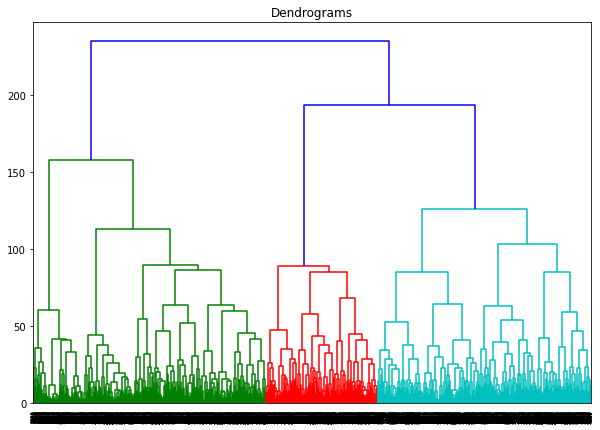

In [125]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

>**Clustering the Dataset using sklearn Agglomerative Clustering method**

In [137]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 1, 1, 1])

In [138]:
q=1
user=[]
for i in range(5454):
  user.append(q)
  q=q+1
user=pd.DataFrame(user,columns=['User'])

In [139]:
data_scaled['user']=user

>**The Data have been clustered in 3 groups**

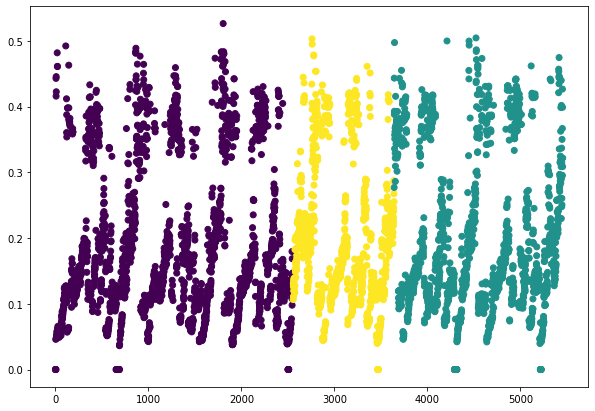

In [141]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['user'], data_scaled['Category 2'], c=cluster.labels_) 